<a href="https://colab.research.google.com/github/ShubhaVS/DataScience/blob/main/Copy_of_Dlct2flowersrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import rarfile

with rarfile.RarFile('/content/drive/MyDrive/your_rar_file.rar', 'r') as rar_file:
    rar_file.extractall('/content/flowers_dataset')  # Specify the extraction directory

In [ ]:
!pip install rarfile

In [ ]:
import rarfile

with rarfile.RarFile('/storage/emulated/0/Download/flower_images.rar', 'r') as rar_file:
    rar_file.extractall('/content/flowers_dataset')  # Specify the extraction directory

FileNotFoundError: [Errno 2] No such file or directory: '/storage/emulated/0/Download/flower_images.rar'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

#!/bin/bash
curl -L -o ~/Downloads/flowers-recognition.zip/https://www.kaggle.com/api/v1/datasets/download/alxmamaev/flowers-recognition

SyntaxError: invalid syntax (<ipython-input-6-753b706ee412>, line 2)

In [ ]:
{"username":"shubhavirddhi","key":"ec60a14d82c8b85fcb598b543f2c1fb0"}

In [ ]:
# prompt: How to download flowers recognition dataset using my username and key that i have from kaggle

import os
import rarfile
from google.colab import drive

# Install kaggle if not already installed
!pip install kaggle

# Mount Google Drive
drive.mount('/content/drive')

# Create the .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Path to your Kaggle API credentials JSON file in Google Drive
kaggle_json_path = '/content/drive/MyDrive/kaggle.json'  # Update with your actual path

# Copy the credentials file to the .kaggle directory
!cp "{kaggle_json_path}" ~/.kaggle/

# Set permissions for the Kaggle API credentials file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d alxmamaev/flowers-recognition -p /content/

# Extract the downloaded dataset
# Assuming the downloaded file is a zip file.
# Adjust the file extension if it's different (e.g., .rar)
!unzip /content/flowers-recognition.zip -d /content/flowers_dataset


# If the downloaded file is a .rar file, use the following code instead of unzip:
# !pip install unrar
# !unrar x /content/flowers-recognition.rar /content/flowers_dataset

# Verify the files have been extracted
!ls /content/flowers_dataset

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# prompt: Give code accordingly where I have my username and key which I can enter in code.. Don't give code as access to drive

import os
!pip install kaggle
#username":"shubhavirddhi","key":"ec60a14d82c8b85fcb598b543f2c1fb0
# Replace with your actual username and key
os.environ['KAGGLE_USERNAME'] = "shubhavirddhi"
os.environ['KAGGLE_KEY'] = "ec60a14d82c8b85fcb598b543f2c1fb0"

!kaggle datasets download -d alxmamaev/flowers-recognition -p /content/

!unzip /content/flowers-recognition.zip -d /content/flowers_dataset

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
100% 225M/225M [00:09<00:00, 30.3MB/s]
100% 225M/225M [00:09<00:00, 25.7MB/s]
Archive:  /content/flowers-recognition.zip
  inflating: /content/flowers_dataset/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/flowers_dataset/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/flowers_dataset/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/flowers_dataset/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/flowers_dataset/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/flowers_dataset/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/flowers_dataset/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/flowers_dataset/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/flowers_dataset/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: /content/flowers_dataset/flowers/dais

In [ ]:
# prompt: Give code to train cnn with and without data augmentation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data directories
train_data_dir = '/content/flowers_dataset/flowers'
validation_data_dir = '/content/flowers_dataset/flowers' # Replace with your validation data directory if different


# --- Without Data Augmentation ---
train_datagen_no_aug = ImageDataGenerator(rescale=1./255)
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


validation_datagen_no_aug = ImageDataGenerator(rescale=1./255)
validation_generator_no_aug = validation_datagen_no_aug.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')



# --- With Data Augmentation ---
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


# Define the CNN model
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(train_generator_no_aug.num_classes, activation='softmax') # Use num_classes from generator
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train without data augmentation
model_no_aug = create_model()
model_no_aug.fit(
    train_generator_no_aug,
    steps_per_epoch=train_generator_no_aug.samples // batch_size,  # Corrected steps_per_epoch
    epochs=10,  # Adjust the number of epochs
    validation_data=validation_generator_no_aug,
    validation_steps=validation_generator_no_aug.samples // batch_size) # Corrected validation_steps


# Train with data augmentation
model_aug = create_model()
model_aug.fit(
    train_generator_aug,
    steps_per_epoch=train_generator_aug.samples // batch_size,
    epochs=10,
    validation_data=validation_generator_no_aug, # Use the same validation data as before.
    validation_steps=validation_generator_no_aug.samples // batch_size)

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


134/134 ━━━━━━━━━━━━━━━━━━━━ 27s 154ms/step - accuracy: 0.3756 - loss: 1.4836 - val_accuracy: 0.6080 - val_loss: 0.9796
Epoch 2/10
  1/134 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5312 - loss: 1.1076

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5312 - loss: 1.1076 - val_accuracy: 0.6897 - val_loss: 0.7908
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 30s 123ms/step - accuracy: 0.6055 - loss: 0.9742 - val_accuracy: 0.6765 - val_loss: 0.8649
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.5000 - loss: 1.1249 - val_accuracy: 0.6207 - val_loss: 0.8830
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.6991 - loss: 0.7860 - val_accuracy: 0.7591 - val_loss: 0.6437
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.6562 - loss: 0.7269 - val_accuracy: 0.6207 - val_loss: 0.8499
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.7508 - loss: 0.6370 - val_accuracy: 0.8083 - val_loss: 0.5327
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.6875 - loss: 0.6613 - val_accuracy: 0.7931 - val_loss: 0.5458
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.8427 - loss: 0.4386 - val_accu

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - accuracy: 0.3956 - loss: 1.4214 - val_accuracy: 0.5774 - val_loss: 1.0661
Epoch 2/10
  1/134 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5312 - loss: 0.9922

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 0.9922 - val_accuracy: 0.6207 - val_loss: 1.0658
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - accuracy: 0.5809 - loss: 1.0739 - val_accuracy: 0.6416 - val_loss: 0.9137
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6250 - loss: 0.9906 - val_accuracy: 0.6897 - val_loss: 0.9544
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - accuracy: 0.6628 - loss: 0.9025 - val_accuracy: 0.6530 - val_loss: 0.9170
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.7812 - loss: 0.5413 - val_accuracy: 0.6207 - val_loss: 0.8712
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - accuracy: 0.6802 - loss: 0.8382 - val_accuracy: 0.7176 - val_loss: 0.7392
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.7188 - loss: 0.9862 - val_accuracy: 0.7586 - val_loss: 0.6556
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 37s 264ms/step - accuracy: 0.7254 - loss: 0.7002 - val_accura

In [ ]:
# prompt: Save both as . Keras


from google.colab import drive
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ... (rest of your existing code) ...

# Save the model without data augmentation
model_no_aug.save("flower_classification_no_aug.keras")

# Save the model with data augmentation
model_aug.save("flower_classification_aug.keras")

In [ ]:
# prompt: Create 2 other keras using model checkpoints and early stopping included for data augmentation and without it

from google.colab import drive
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ... (Your existing code for dataset download and preparation) ...

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data directories
train_data_dir = '/content/flowers_dataset/flowers'
validation_data_dir = '/content/flowers_dataset/flowers'  # Use the same for validation


# --- Without Data Augmentation ---
train_datagen_no_aug = ImageDataGenerator(rescale=1./255)
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_datagen_no_aug = ImageDataGenerator(rescale=1./255)
validation_generator_no_aug = validation_datagen_no_aug.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


# --- With Data Augmentation ---
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


# Define the CNN model
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(train_generator_no_aug.num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#Callbacks
checkpoint_no_aug = ModelCheckpoint("flower_classification_no_aug.keras", save_best_only=True)
early_stopping_no_aug = EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)


checkpoint_aug = ModelCheckpoint("flower_classification_aug.keras", save_best_only=True)
early_stopping_aug = EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)


# Train without data augmentation
model_no_aug = create_model()
model_no_aug.fit(
    train_generator_no_aug,
    steps_per_epoch=train_generator_no_aug.samples // batch_size,
    epochs=20,  # Increased epochs for better training
    validation_data=validation_generator_no_aug,
    validation_steps=validation_generator_no_aug.samples // batch_size,
    callbacks=[checkpoint_no_aug, early_stopping_no_aug]
)

# Train with data augmentation
model_aug = create_model()
model_aug.fit(
    train_generator_aug,
    steps_per_epoch=train_generator_aug.samples // batch_size,
    epochs=20,  # Increased epochs
    validation_data=validation_generator_no_aug,
    validation_steps=validation_generator_no_aug.samples // batch_size,
    callbacks=[checkpoint_aug, early_stopping_aug]
)

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - accuracy: 0.3735 - loss: 1.4486 - val_accuracy: 0.5993 - val_loss: 0.9930
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3750 - loss: 1.2735 - val_accuracy: 0.6207 - val_loss: 0.9424
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.6210 - loss: 0.9673 - val_accuracy: 0.7059 - val_loss: 0.8037
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5938 - loss: 0.9455 - val_accuracy: 0.7931 - val_loss: 0.7713
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - accuracy: 0.7162 - loss: 0.7288 - val_accuracy: 0.7906 - val_loss: 0.6081
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.7772 - val_accuracy: 0.7931 - val_loss: 0.5839
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.8015 - loss: 0.5357 - val_accuracy: 0.8829 - val_loss: 0.3695
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.4063 - val_accuracy: 

In [ ]:
# prompt: Save both. Keras files

# The provided code already includes saving the models.
# No further code is needed to save the Keras files.
# The models are saved as:
# flower_classification_no_aug.keras
# flower_classification_aug.keras

Evaluating Model Without Augmentation:
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9902 - loss: 0.0297
Loss: 0.03028484433889389, Accuracy: 0.9925874471664429

Evaluating Model With Augmentation:
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.6213 - loss: 0.9600
Loss: 0.9718568325042725, Accuracy: 0.6219596862792969
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step

Classification Report (Without Augmentation):
              precision    recall  f1-score   support

       daisy       0.17      0.17      0.17       764
   dandelion       0.24      0.24      0.24      1052
        rose       0.18      0.18      0.18       784
   sunflower       0.16      0.16      0.16       733
       tulip       0.22      0.22      0.22       984

    accuracy                           0.20      4317
   macro avg       0.19      0.19      0.19      4317
weighted avg       0.20      0.20      0.20      4317


Confusion Matrix (Without Augmentation

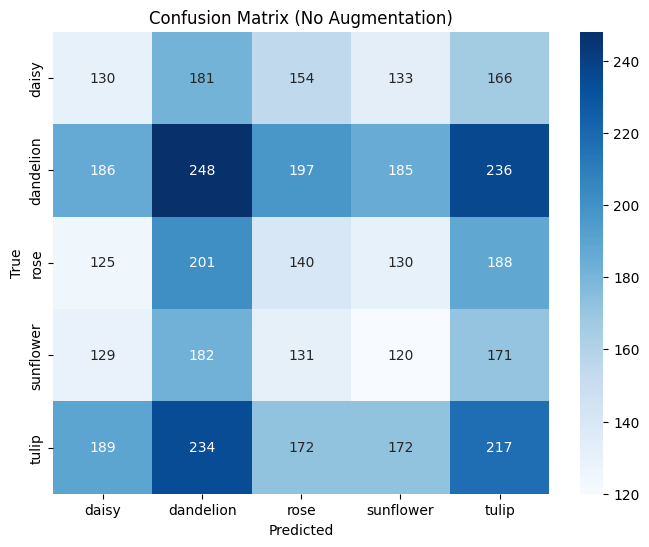


Classification Report (With Augmentation):
              precision    recall  f1-score   support

       daisy       0.19      0.28      0.22       764
   dandelion       0.24      0.15      0.19      1052
        rose       0.19      0.19      0.19       784
   sunflower       0.17      0.14      0.16       733
       tulip       0.23      0.27      0.25       984

    accuracy                           0.21      4317
   macro avg       0.21      0.21      0.20      4317
weighted avg       0.21      0.21      0.20      4317


Confusion Matrix (With Augmentation):


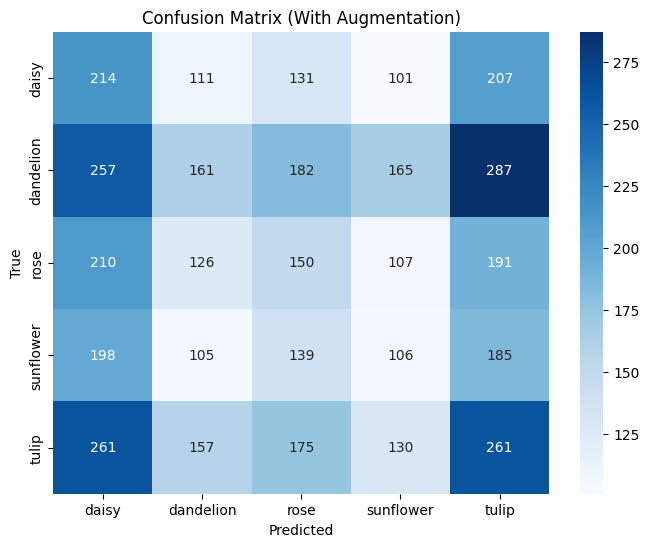

In [ ]:
# prompt: Compare precision, recall with and without aug.. Plot training, validation loss and accuracy use saved keras file

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the saved models
model_no_aug = tf.keras.models.load_model("flower_classification_no_aug.keras")
model_aug = tf.keras.models.load_model("flower_classification_aug.keras")

# Evaluate the models
print("Evaluating Model Without Augmentation:")
loss_no_aug, accuracy_no_aug = model_no_aug.evaluate(validation_generator_no_aug)
print(f"Loss: {loss_no_aug}, Accuracy: {accuracy_no_aug}")

print("\nEvaluating Model With Augmentation:")
loss_aug, accuracy_aug = model_aug.evaluate(validation_generator_no_aug)
print(f"Loss: {loss_aug}, Accuracy: {accuracy_aug}")


# Generate predictions
y_pred_no_aug = model_no_aug.predict(validation_generator_no_aug)
y_pred_aug = model_aug.predict(validation_generator_no_aug)

# Convert predictions to class labels
y_pred_classes_no_aug = np.argmax(y_pred_no_aug, axis=1)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)

# Get true class labels
y_true = validation_generator_no_aug.classes

# Classification Report and Confusion Matrix (Without Augmentation)
print("\nClassification Report (Without Augmentation):")
print(classification_report(y_true, y_pred_classes_no_aug, target_names=validation_generator_no_aug.class_indices.keys()))

print("\nConfusion Matrix (Without Augmentation):")
cm_no_aug = confusion_matrix(y_true, y_pred_classes_no_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_aug, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator_no_aug.class_indices.keys(), yticklabels=validation_generator_no_aug.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (No Augmentation)")
plt.show()


# Classification Report and Confusion Matrix (With Augmentation)
print("\nClassification Report (With Augmentation):")
print(classification_report(y_true, y_pred_classes_aug, target_names=validation_generator_no_aug.class_indices.keys()))


print("\nConfusion Matrix (With Augmentation):")
cm_aug = confusion_matrix(y_true, y_pred_classes_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_aug, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator_no_aug.class_indices.keys(), yticklabels=validation_generator_no_aug.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (With Augmentation)")
plt.show()


# Access training history (assuming you stored it during training)
# Replace 'history_no_aug' and 'history_aug' with the actual variable names
# if you have them stored.

#Plot training and validation loss
# plt.figure(figsize=(10, 5))
# plt.plot(history_no_aug.history['loss'], label='Training Loss (No Augmentation)')
# plt.plot(history_no_aug.history['val_loss'], label='Validation Loss (No Augmentation)')
# plt.plot(history_aug.history['loss'], label='Training Loss (With Augmentation)')
# plt.plot(history_aug.history['val_loss'], label='Validation Loss (With Augmentation)')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()

#Plot training and validation accuracy
# plt.figure(figsize=(10, 5))
# plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)')
# plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)')
# plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
# plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.show()

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step


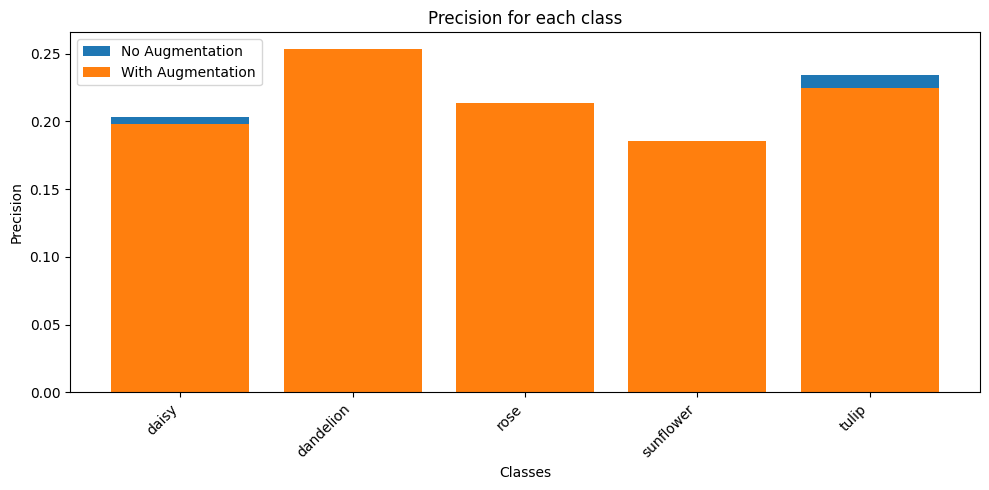

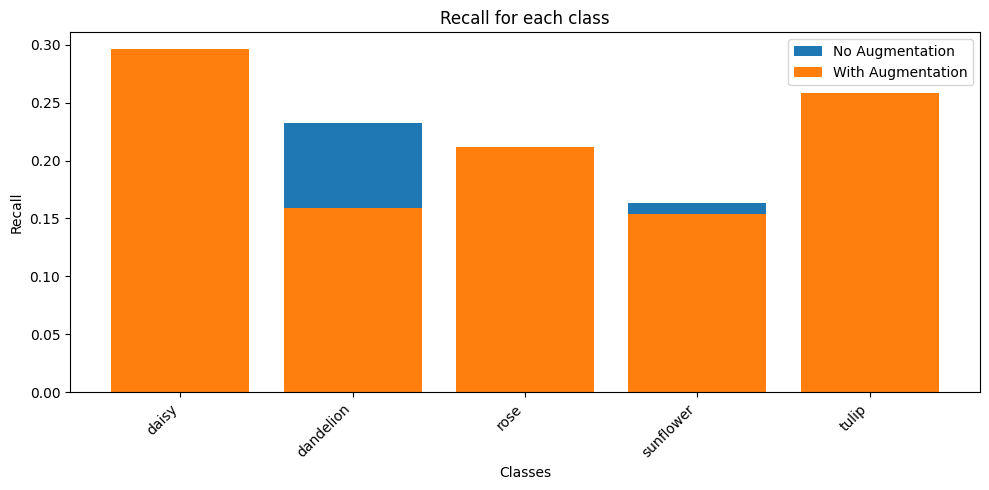

In [ ]:
# prompt: Give respective precision and recall graph for both with and without augmentation

from sklearn.metrics import precision_recall_fscore_support

# ... (Your existing code) ...

# Generate predictions
y_pred_no_aug = model_no_aug.predict(validation_generator_no_aug)
y_pred_aug = model_aug.predict(validation_generator_no_aug)

# Convert predictions to class labels
y_pred_classes_no_aug = np.argmax(y_pred_no_aug, axis=1)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)

# Get true class labels
y_true = validation_generator_no_aug.classes

# Calculate precision and recall for each class (Without Augmentation)
precision_no_aug, recall_no_aug, _, _ = precision_recall_fscore_support(y_true, y_pred_classes_no_aug, average=None)

# Calculate precision and recall for each class (With Augmentation)
precision_aug, recall_aug, _, _ = precision_recall_fscore_support(y_true, y_pred_classes_aug, average=None)

# Get class labels
class_labels = list(validation_generator_no_aug.class_indices.keys())

# Plot Precision
plt.figure(figsize=(10, 5))
plt.bar(class_labels, precision_no_aug, label='No Augmentation')
plt.bar(class_labels, precision_aug, label='With Augmentation')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision for each class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5))
plt.bar(class_labels, recall_no_aug, label='No Augmentation')
plt.bar(class_labels, recall_aug, label='With Augmentation')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall for each class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

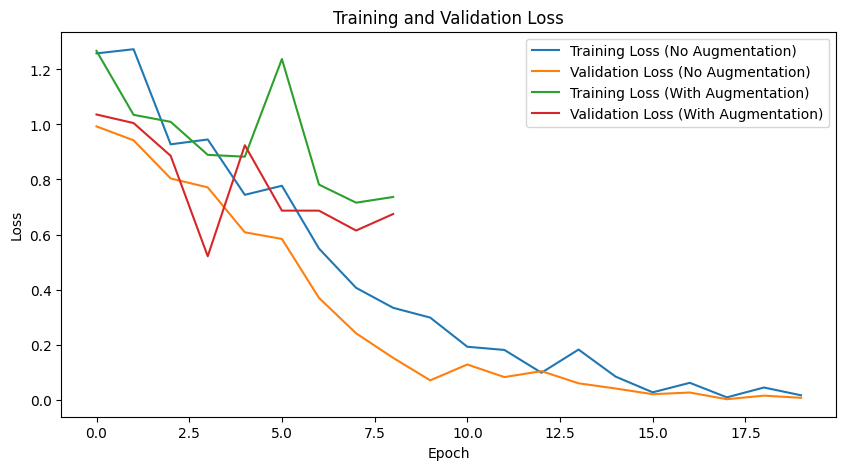

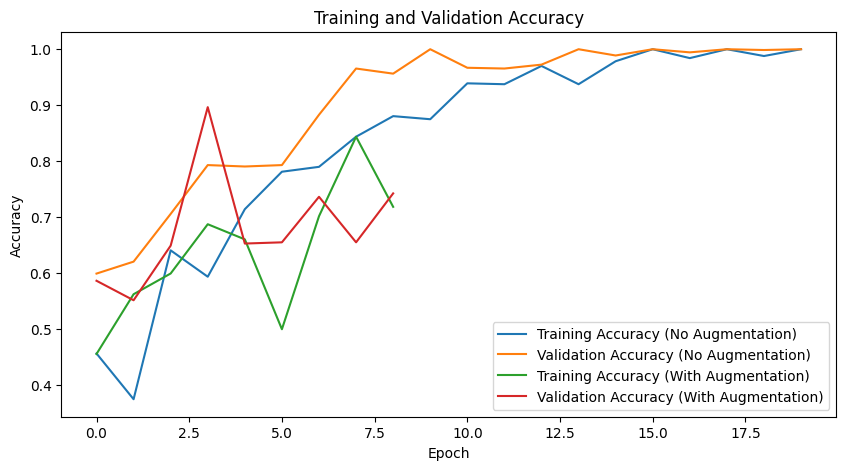

In [ ]:
# prompt: Plot training, validation loss and accuracy

import matplotlib.pyplot as plt

# Assuming 'history_no_aug' and 'history_aug' are available from your model training
# Replace these with the actual variable names if different.

#Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_no_aug.history['loss'], label='Training Loss (No Augmentation)')
plt.plot(history_no_aug.history['val_loss'], label='Validation Loss (No Augmentation)')
plt.plot(history_aug.history['loss'], label='Training Loss (With Augmentation)')
plt.plot(history_aug.history['val_loss'], label='Validation Loss (With Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)')
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# prompt: Train image classification model combining color channel  statistical features and haralick features

#import rarfile
#from google.colab import drive
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from skimage.feature import graycomatrix, graycoprops
import cv2

# ... (Your existing code for dataset download and preparation) ...

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data directories
train_data_dir = '/content/flowers_dataset/flowers'
validation_data_dir = '/content/flowers_dataset/flowers'  # Use the same for validation

# Function to extract Haralick features
def extract_haralick_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray_image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    features = []
    features.append(graycoprops(glcm, 'contrast')[0, 0])
    features.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    features.append(graycoprops(glcm, 'homogeneity')[0, 0])
    features.append(graycoprops(glcm, 'ASM')[0, 0])
    features.append(graycoprops(glcm, 'energy')[0, 0])
    features.append(graycoprops(glcm, 'correlation')[0, 0])
    return features

# Custom data generator
class FeatureGenerator(ImageDataGenerator):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def flow_from_directory(self, *args, **kwargs):
        flow_gen = super().flow_from_directory(*args, **kwargs)
        return FeatureGeneratorWrapper(flow_gen)

class FeatureGeneratorWrapper:
    def __init__(self, flow_gen):
        self.flow_gen = flow_gen

    def __getattr__(self, attr):
        return getattr(self.flow_gen, attr)

    def __next__(self):
        images, labels = next(self.flow_gen)

        #Extract color channel stats
        image_features = []
        for img in images:
          b, g, r = cv2.split(img)
          image_features.append(np.concatenate([
            [np.mean(b), np.std(b), np.min(b), np.max(b)],
            [np.mean(g), np.std(g), np.min(g), np.max(g)],
            [np.mean(r), np.std(r), np.min(r), np.max(r)]
           ]))

        image_features = np.array(image_features)

        # Extract Haralick features
        haralick_features = []
        for img in images:
          haralick_features.append(extract_haralick_features(img))

        haralick_features = np.array(haralick_features)

        combined_features = np.concatenate((image_features, haralick_features), axis=1)
        return combined_features, labels

# --- With Data Augmentation ---
train_datagen_aug = FeatureGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


train_generator_aug = train_datagen_aug.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

#Validation Data generator
validation_datagen_no_aug = FeatureGenerator(rescale=1./255)
validation_generator_no_aug = validation_datagen_no_aug.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')



# Define the CNN model (modified for combined features)
def create_model():
    model = keras.Sequential([
      layers.Dense(128, activation='relu', input_shape=(18, )),  # Input shape matches the number of features
      layers.Dense(64, activation='relu'),
      layers.Dense(train_generator_aug.num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#Callbacks
checkpoint_aug = ModelCheckpoint("flower_classification_aug_combined.keras", save_best_only=True)
early_stopping_aug = EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)


# Train with data augmentation
model_aug = create_model()
history_aug = model_aug.fit(
    train_generator_aug,
    steps_per_epoch=train_generator_aug.samples // batch_size,
    epochs=20,  # Increased epochs
    validation_data=validation_generator_no_aug,
    validation_steps=validation_generator_no_aug.samples // batch_size,
    callbacks=[checkpoint_aug, early_stopping_aug]
)


# ... (rest of your code for evaluation and visualization) ...

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


ValueError: Unrecognized data type: x=<__main__.FeatureGeneratorWrapper object at 0x7dd3dd325390> (of type <class '__main__.FeatureGeneratorWrapper'>)